<a href="https://colab.research.google.com/github/Sweta-Das/ServeMandu_A-Home-Solutions-App/blob/main/ServiceRecommendationKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import collections

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
# Downloading dataset
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_excel('drive/MyDrive/ServiceRecommendation/DatasetForMP.xlsx')
dataset = dataset.sample(frac=1).reset_index(drop=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset.head()

,uid,lat,lng,serviceIDs,orderATime,orderId,itemID,title
0,iaKutxWIZyOFnAH8ymZjwf4KUfl42,68.712635,88.902952,1.678696e+12,2023-03-13 20:34:50,1.678719e+12,1.677415e+12,Software
1,nM4gMLP8jqTXiGwukwdrXx8TJPk1,27.678546,85.304622,1.677415e+12,2023-03-13 20:21:31,1.678718e+12,1.677415e+12,Antivirus
2,iaKutxWIZyOFnAH8ymZjwf4KUfl48,74.712635,60.098323,1.677413e+12,2023-03-13 20:34:34,1.678719e+12,1.677413e+12,Facial
3,iaKutxWIZyOFnAH8ymZjwf4KUfl15,41.712635,73.980830,1.678696e+12,2023-03-13 20:34:50,1.678719e+12,1.677413e+12,Thread & wax
4,4vlBpikHTKMLNmThxAQRcCpso152,27.678510,85.304612,1.677413e+12,2023-01-19 22:07:13,1.678725e+12,1.677413e+12,Thread & wax


In [ ]:
dataset.describe()

,lat,lng,serviceIDs,orderId,itemID
count,229.000000,229.000000,2.290000e+02,2.290000e+02,2.290000e+02
mean,34.887776,81.117092,1.678148e+12,1.678713e+12,1.678089e+12
std,14.582720,9.233089,6.487458e+08,1.056461e+07,8.818890e+08
min,20.204678,40.091453,1.677413e+12,1.678649e+12,1.677413e+12
25%,27.688812,84.902952,1.677413e+12,1.678710e+12,1.677413e+12
50%,27.712647,85.294191,1.678696e+12,1.678719e+12,1.677415e+12
75%,32.712635,85.294276,1.678696e+12,1.678719e+12,1.678696e+12
max,82.712635,89.980835,1.678844e+12,1.678725e+12,1.681690e+12


In [ ]:
dataset["uid"].unique()

dataset["uid"].nunique()

111

In [ ]:
X = dataset.drop(columns=["itemID", "serviceIDs", "itemID", "uid", "orderId", "orderATime", "title"])

In [ ]:
X.head(3)

,lat,lng
0,68.712635,88.902952
1,27.678546,85.304622
2,74.712635,60.098323


In [ ]:
# Output
y = dataset["title"].astype('category')

In [ ]:
y.head()

0        Software
1       Antivirus
2          Facial
3    Thread & wax
4    Thread & wax
Name: title, dtype: category
Categories (16, object): ['Air Conditioner', 'Antivirus', 'Electrician Service', 'Facial', ...,
                          'Room Cleaning', 'Software', 'TV', 'Thread & wax']

In [ ]:
dataset["title"].unique()

array(['Software', 'Antivirus', 'Facial', 'Thread & wax', 'Manicure',
       'Plumbing Service', 'Pest Cleaning', 'Microwave', 'Hardware', 'TV',
       'Pedicure', 'Room Cleaning', 'Refrigerator', 'Air Conditioner',
       'Gardening Service', 'Electrician Service'], dtype=object)

In [ ]:
y = pd.DataFrame(y)
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(229, 1)


Class = 13, n=12, (5.240%)
Class = 1, n=14, (6.114%)
Class = 3, n=21, (9.170%)
Class = 15, n=26, (11.354%)
Class = 6, n=14, (6.114%)
Class = 10, n=8, (3.493%)
Class = 9, n=27, (11.790%)
Class = 7, n=8, (3.493%)
Class = 5, n=18, (7.860%)
Class = 14, n=11, (4.803%)
Class = 8, n=17, (7.424%)
Class = 12, n=14, (6.114%)
Class = 11, n=13, (5.677%)
Class = 0, n=7, (3.057%)
Class = 4, n=12, (5.240%)
Class = 2, n=7, (3.057%)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


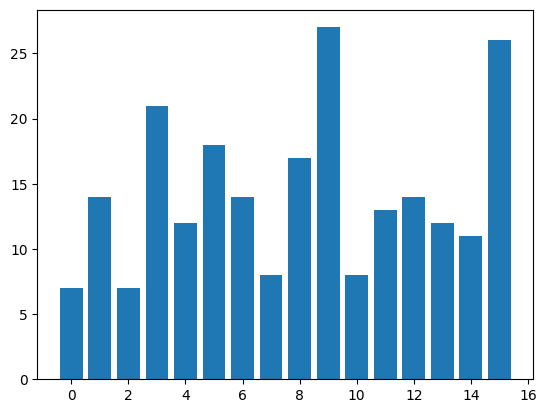

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

counter = Counter(y)
for k,v in counter.items():
  per = v/len(y)*100
  print('Class = %d, n=%d, (%.3f%%)'%(k,v,per))
pyplot.bar(counter.keys(),counter.values())
pyplot.show()

In [ ]:
# y = encoder.inverse_transform(y)
print(y)


[13  1  3 15 15  1 15  6 15 10  1  9  1  7 15  6  5 15 14  6  8  3  3 15
  6 12  1 11  3  3 15 12 12  0  5  0 15  3  6  0  8 13 12  4  6  9  9  9
 10  8  2  5  9  2  8 12 11 13 10 15  8  5  9 14  9  4  9 11 12 15  9  4
  9  4  1  7 11 13 15 12  4  8  8  0  7 10  8  9  9 15 14 12  3  4 13  5
  7  5  9  9  1  5 11  5  8 11 14  1  7 15 15  9 12 12 14  0  4  9 11  6
  6  4 14  1 15  6 15 11  7  5 14  8  3  1  8 13  6  5 11  5  6  5  5  9
  2 13 14  8  8 13  8  2  5  7  5 15  5  6  3  3  4  9  9 12  3  4  4 12
 11 14 15 15  3 11 13  3  1  9  5  3  3  6 14  3  1  7 15 10  1  1 12  9
  0 15 10 12 13  3  8  8  6  2  3  4  8  9  9 14 10 11  5  3  3  9  2 10
  9  9 15 13 15 11 15 13  9  2  3 15  0]


Class = 13, n=27, (6.250%)
Class = 1, n=27, (6.250%)
Class = 3, n=27, (6.250%)
Class = 15, n=27, (6.250%)
Class = 6, n=27, (6.250%)
Class = 10, n=27, (6.250%)
Class = 9, n=27, (6.250%)
Class = 7, n=27, (6.250%)
Class = 5, n=27, (6.250%)
Class = 14, n=27, (6.250%)
Class = 8, n=27, (6.250%)
Class = 12, n=27, (6.250%)
Class = 11, n=27, (6.250%)
Class = 0, n=27, (6.250%)
Class = 4, n=27, (6.250%)
Class = 2, n=27, (6.250%)


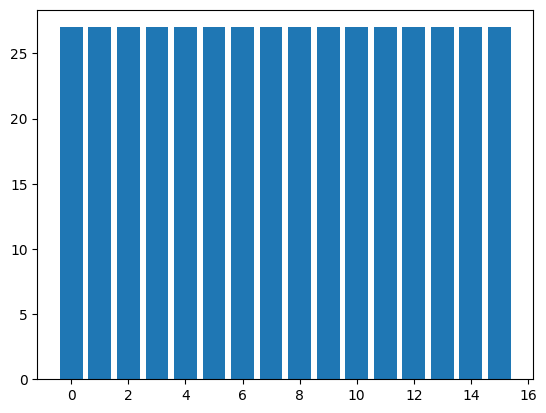

In [ ]:
oversample = SMOTE()

X,y = oversample.fit_resample(X,y)

counter = Counter(y)
for k,v in counter.items():
  per = v/len(y)*100
  print('Class = %d, n=%d, (%.3f%%)'%(k,v,per))
pyplot.bar(counter.keys(),counter.values())
pyplot.show()

In [ ]:
X.head()

,lat,lng
0,68.712635,88.902952
1,27.678546,85.304622
2,74.712635,60.098323
3,41.712635,73.980830
4,27.678510,85.304612


In [ ]:
y = pd.get_dummies(y)
y.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
print(X.shape)
print(y.shape)

(432, 2)
(432, 16)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state = 10, shuffle=True)

In [ ]:
print(y_test.shape)
print(y_train.shape)

(108, 16)
(324, 16)


In [ ]:
y_test.nunique()

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
dtype: int64

### Integrating Keras

For this class it is useful if everyone gets the same results from their training. Keras uses a random number generator at certain points during its execution. Therefore we will need to set two random seeds, one for numpy and one for tensorflow:

In [ ]:
y_test.shape

(108, 16)

In [ ]:
X_test.shape

(108, 2)

In [ ]:
# from numpy.random import seed
# seed(1)
# from tensorflow import random
# random.set_seed(2)

In [ ]:
X_train.shape[1]

2

Keras automatically calculates the number of inputs and outputs a layer needs and thus, how many edges need to be created. We instantiate 'keras.Input()' to let Keras know how big our input is going to be.

In [ ]:
inputs = keras.Input(shape=X_train.shape[1])

Storing reference to this input class in a variable so, it can be passed to the creation of our hidden layer.

In [ ]:
# Creating hidden layer
hidden_layer = keras.layers.Dense(128, activation="relu")(inputs)


128 => number of neurons we want in this layer
relu => activation function; It's 0 for inputs 0 and below, while returns identity function for inputs above 0.
(inputs)=> This means that after creating an instance of the Dense layer we call it as if it was a function. This tells the Dense layer to connect the layer passed as a parameter, in this case the inputs. Finally we store a reference so we can pass it to the output layer in a minute.

In [ ]:
# Creating another layer-output layer
output_layer = keras.layers.Dense(16, activation="softmax")(hidden_layer)

We chose 1 neuron for the output layer

In [ ]:
# Applying Keras model
model = keras.Model(inputs = inputs, outputs = output_layer)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_8 (Dense)             (None, 128)               384       
                                                                 
 dense_9 (Dense)             (None, 16)                2064      
                                                                 
Total params: 2,448
Trainable params: 2,448
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Loss function
model.compile(optimizer = 'adam', loss = keras.losses.CategoricalCrossentropy(),metrics = ['accuracy'])

In [ ]:
# Train model
history = model.fit(X_train, y_train, epochs=150)

Epoch 1/150
11/11 [==============================] - 1s 3ms/step - loss: 16.0916 - accuracy: 0.0617
Epoch 2/150
11/11 [==============================] - 0s 3ms/step - loss: 7.0936 - accuracy: 0.0710
Epoch 3/150
11/11 [==============================] - 0s 3ms/step - loss: 4.8806 - accuracy: 0.0309
Epoch 4/150
11/11 [==============================] - 0s 4ms/step - loss: 3.4704 - accuracy: 0.0679
Epoch 5/150
11/11 [==============================] - 0s 4ms/step - loss: 3.1861 - accuracy: 0.0802
Epoch 6/150
11/11 [==============================] - 0s 4ms/step - loss: 3.1297 - accuracy: 0.0802
Epoch 7/150
11/11 [==============================] - 0s 3ms/step - loss: 3.0246 - accuracy: 0.0525
Epoch 8/150
11/11 [==============================] - 0s 3ms/step - loss: 2.9170 - accuracy: 0.0833
Epoch 9/150
11/11 [==============================] - 0s 3ms/step - loss: 2.8900 - accuracy: 0.0463
Epoch 10/150
11/11 [==============================] - 0s 4ms/step - loss: 2.8347 - accuracy: 0.0741
Epoch 11

<Axes: >

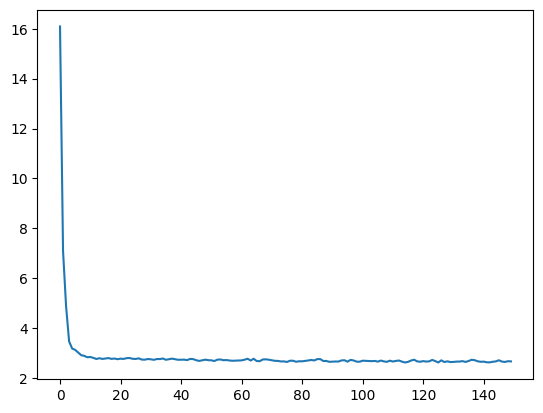

In [ ]:
import seaborn as sns

sns.lineplot(x=history.epoch, y=history.history['loss'])

<Axes: >

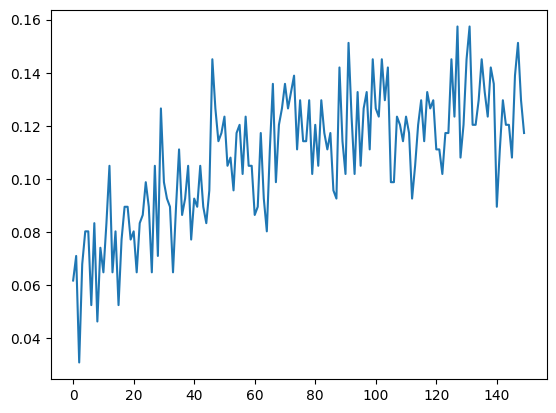

In [ ]:
sns.lineplot(x=history.epoch, y=history.history['accuracy'])

In [ ]:
y_pred = model.predict(X_test)


4/4 [==============================] - 0s 3ms/step


In [ ]:
# y_pred[5]

In [ ]:
y_pred = model.predict(np.array([[38.9, 80.9]]))
print(pd.DataFrame(y_pred, columns=y.columns).idxmax(axis="columns"))
y_pred

1/1 [==============================] - 0s 52ms/step
0    0
dtype: int64


array([[0.16330151, 0.03945572, 0.05925531, 0.04834421, 0.06121188,
        0.01625487, 0.04924504, 0.05240558, 0.01361942, 0.05398227,
        0.08440463, 0.08746304, 0.03568583, 0.03462141, 0.13612321,
        0.06462606]], dtype=float32)

In [ ]:
prediction = pd.DataFrame(y_pred, columns = y.columns)
prediction

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.163302,0.039456,0.059255,0.048344,0.061212,0.016255,0.049245,0.052406,0.013619,0.053982,0.084405,0.087463,0.035686,0.034621,0.136123,0.064626


In [ ]:
prediction = pd.DataFrame(y_pred, columns=y.columns)
#  y.columns
# yi= encoder.inverse_transform(y)
# print(yi) 
prediction

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.163302,0.039456,0.059255,0.048344,0.061212,0.016255,0.049245,0.052406,0.013619,0.053982,0.084405,0.087463,0.035686,0.034621,0.136123,0.064626


In [ ]:
predicted_service= prediction.idxmax(axis="columns")
print(predicted_service)

0    0
dtype: int64


Saving the model.

In [ ]:
model.save('/content/recommendationmodel.h5') # saving as keras h5 model

In [ ]:
# from sklearn.metrics import confusion_matrix

# true_species = y_test.idxmax(axis="columns")

# matrix = confusion_matrix(true_species, predicted_service)
# print(matrix)

In [ ]:
# tf.saved_model.save(model,'/drive/MyDrive/New/my_first_model/')
# tf.keras.models.save_model(model, 'model.pbtxt')

# converter = tf.lite.TFLiteConverter.from_keras_model(model = model)

# model_tflite = converter.convert()

# open("LinearRegressionModel.tflite", "wb").write(model_tflite)

modelnew = keras.models.load_model('/content/recommendationmodel.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(modelnew)
model_tflite = converter.convert()
open("recommendation_model.tflite", "wb").write(model_tflite)


11452

Rechecking the model

In [ ]:
y_pred = model.predict(np.array([[26.9,80.9]]))
print(y_pred)
prediction = pd.DataFrame(y_pred, columns=y.columns)

1/1 [==============================] - 0s 23ms/step
[[0.08685823 0.05759721 0.07518781 0.04488399 0.05981679 0.04667018
  0.10576539 0.07536232 0.04646912 0.05190143 0.05890969 0.02465998
  0.08043521 0.09435702 0.024832   0.06629362]]


In [ ]:
predicted_service= prediction.idxmax(axis="columns")
print(predicted_service)

0    6
dtype: int64


In [ ]:
# pretrained_model = keras.models.load_model('/drive/MyDrive/New/my_first_model')

In [ ]:
# np.array([87.9,89.9]).shape

In [ ]:
# y_pretrained_pred = pretrained_model.predict(np.array([[24.9,59.9]]))
# pretrained_prediction = pd.DataFrame(y_pretrained_pred, columns=y.columns.values)

# idxmax will select the column for each row with the highest value
# pretrained_predicted_service = pretrained_prediction.idxmax(axis="columns")
# print(pretrained_predicted_service)

In [ ]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
# tflite_model = converter.convert()

# # Save the model.
# with open('/drive/MyDrive/New/model.tflite', 'wb') as f:
#   f.write(tflite_model)